In [76]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_palette("GnBu_d")
sns.set_style("whitegrid")

In [77]:
# Load the Datasets

traffic_train = pd.read_csv('../../datasets/training_data.csv', encoding='latin1')
traffic_test = pd.read_csv('../../datasets/test_data.csv', encoding='latin1')

city_name                     0
record_date                   0
AVERAGE_SPEED_DIFF         2200
AVERAGE_FREE_FLOW_SPEED       0
AVERAGE_TIME_DIFF             0
AVERAGE_FREE_FLOW_TIME        0
LUMINOSITY                    0
AVERAGE_TEMPERATURE           0
AVERAGE_ATMOSP_PRESSURE       0
AVERAGE_HUMIDITY              0
AVERAGE_WIND_SPEED            0
AVERAGE_CLOUDINESS         2682
AVERAGE_PRECIPITATION         0
AVERAGE_RAIN               6249
dtype: int64


<Axes: >

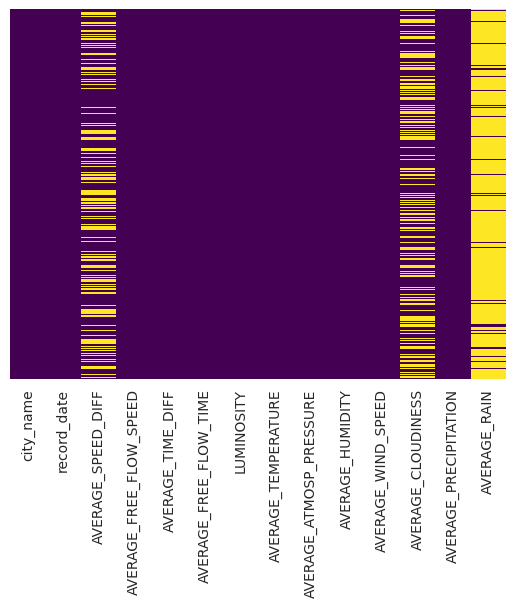

In [78]:
# Missing Values

print(traffic_train.isna().sum())

sns.heatmap(traffic_train.isnull(), yticklabels=False, cbar=False, cmap='viridis')


<Axes: >

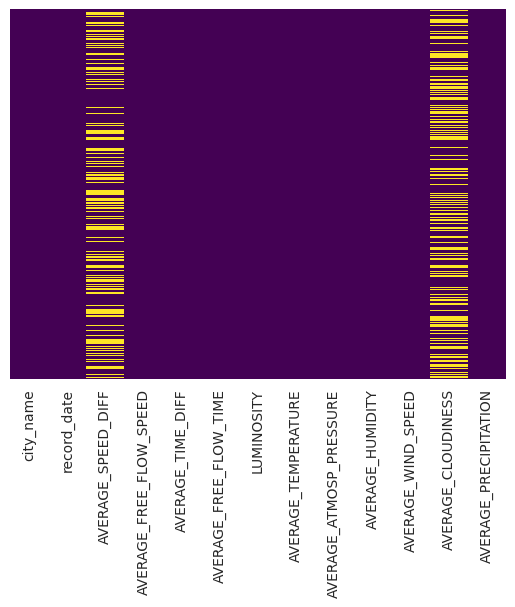

In [79]:
## Remove AVERAGE_RAIN due to high number of missing values

traffic_train.drop(['AVERAGE_RAIN'], axis = 1, inplace=True)
traffic_test.drop(['AVERAGE_RAIN'], axis = 1, inplace=True)

sns.heatmap(traffic_train.isnull(), yticklabels=False, cbar=False, cmap='viridis')


AVERAGE_CLOUDINESS
céu claro            1582
céu pouco nublado     516
nuvens dispersas      459
nuvens quebrados      448
algumas nuvens        422
nuvens quebradas      416
céu limpo             153
tempo nublado          67
nublado                67
Name: count, dtype: int64


/tmp/ipykernel_9310/4237035384.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='AVERAGE_CLOUDINESS', y='AVERAGE_TIME_DIFF', data=traffic_train, palette="Pastel1")


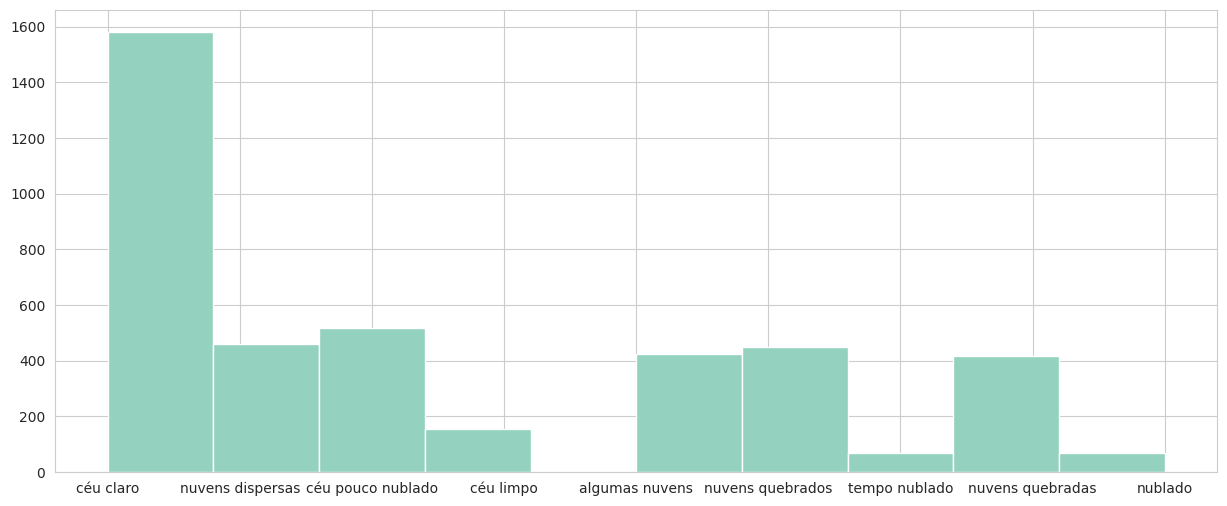

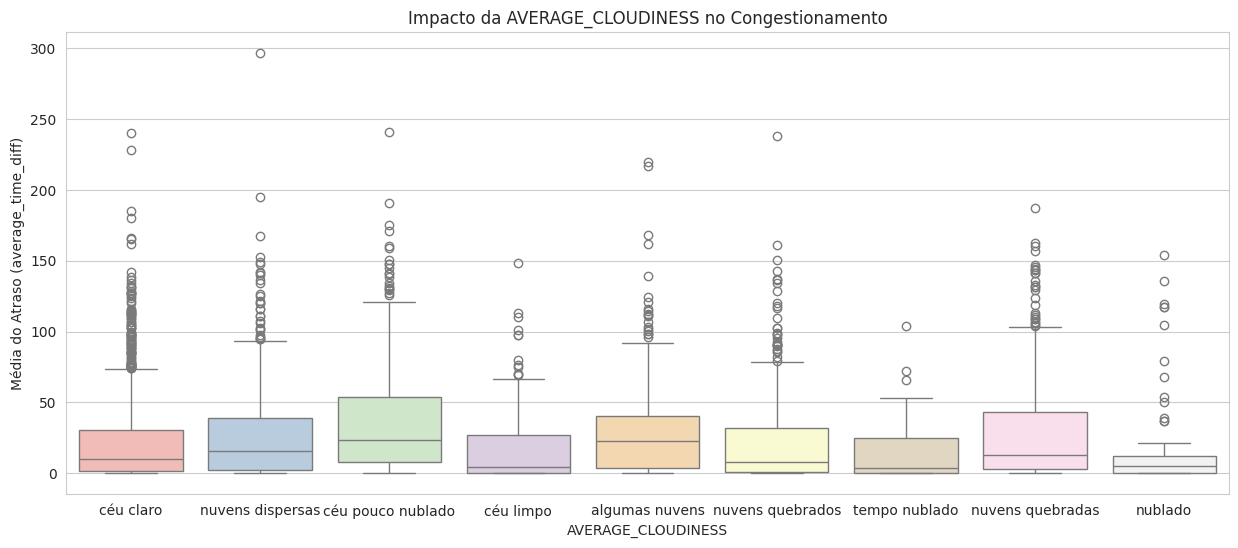

In [80]:
## AVERAGE_CLOUDINESS
### First check statistics and distribution

traffic_train["AVERAGE_CLOUDINESS"].hist(figsize=(15,6))
print(traffic_train["AVERAGE_CLOUDINESS"].value_counts())


plt.figure(figsize=(15, 6))
sns.boxplot(x='AVERAGE_CLOUDINESS', y='AVERAGE_TIME_DIFF', data=traffic_train, palette="Pastel1")
plt.title('Impacto da AVERAGE_CLOUDINESS no Congestionamento')
plt.xlabel('AVERAGE_CLOUDINESS')
plt.ylabel('Média do Atraso (average_time_diff)')
plt.show()

### O valor da moda representa 40% dos dados mas ainda assim só não devemos excluir caso tenha impacto no medolo


AVERAGE_SPEED_DIFF
Medium       1651
Low          1419
High         1063
Very_High     479
Name: count, dtype: int64
MV: 2200


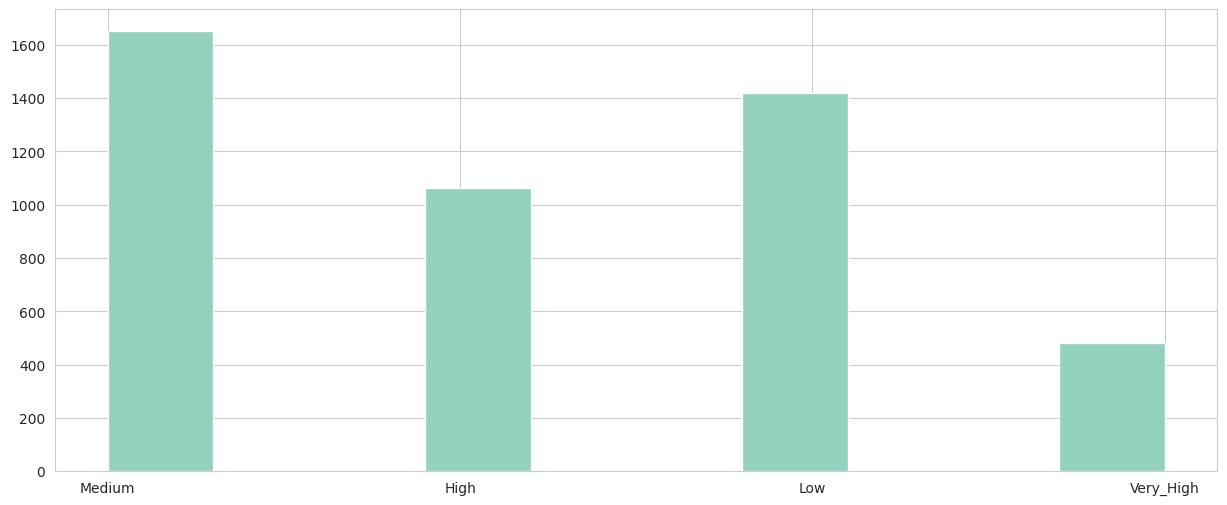

In [81]:
### AVERAGE_SPEED_DIFF
print(traffic_train["AVERAGE_SPEED_DIFF"].value_counts())
traffic_train["AVERAGE_SPEED_DIFF"].hist(figsize=(15,6))

print(f"MV: {traffic_train["AVERAGE_SPEED_DIFF"].isna().sum()}")


TypeError: can't multiply sequence by non-int of type 'float'

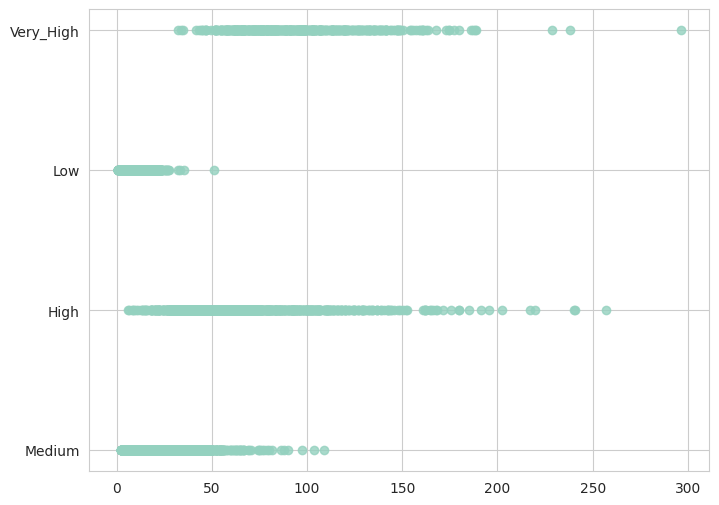

In [82]:


plt.figure(figsize=(8, 6))
sns.regplot(
    x='AVERAGE_TIME_DIFF', 
    y='AVERAGE_SPEED_DIFF', 
    data=traffic_train
)
plt.title('Relação entre Atraso (Tempo) e Perda de Velocidade', fontsize=14)
plt.xlabel('AVERAGE_TIME_DIFF (Atraso em Unidades de Tempo)')
plt.ylabel('AVERAGE_SPEED_DIFF (Perda de Velocidade)')
plt.show()

In [83]:
# Outliers

traffic_train.head()

,city_name,record_date,AVERAGE_SPEED_DIFF,AVERAGE_FREE_FLOW_SPEED,AVERAGE_TIME_DIFF,AVERAGE_FREE_FLOW_TIME,LUMINOSITY,AVERAGE_TEMPERATURE,AVERAGE_ATMOSP_PRESSURE,AVERAGE_HUMIDITY,AVERAGE_WIND_SPEED,AVERAGE_CLOUDINESS,AVERAGE_PRECIPITATION
0,Porto,2019-08-29 07:00:00,Medium,41.5,11.5,71.4,LIGHT,15.0,1019.0,100.0,3.0,NaN,0.0
1,Porto,2018-08-10 14:00:00,High,41.7,48.3,87.4,LIGHT,21.0,1021.0,53.0,5.0,céu claro,0.0
2,Porto,2019-09-01 16:00:00,High,38.6,38.4,85.2,LIGHT,26.0,1014.0,61.0,4.0,NaN,0.0
3,Porto,2019-02-26 11:00:00,High,37.4,61.0,94.1,LIGHT,18.0,1025.0,48.0,4.0,céu claro,0.0
4,Porto,2019-06-06 12:00:00,Medium,41.6,50.4,77.0,LIGHT,15.0,1008.0,82.0,10.0,NaN,0.0


,AVERAGE_FREE_FLOW_SPEED,AVERAGE_TIME_DIFF,AVERAGE_FREE_FLOW_TIME,AVERAGE_TEMPERATURE,AVERAGE_ATMOSP_PRESSURE,AVERAGE_HUMIDITY,AVERAGE_WIND_SPEED,AVERAGE_PRECIPITATION
count,6812.000000,6812.000000,6812.000000,6812.000000,6812.000000,6812.000000,6812.000000,6812.0
mean,40.661010,25.637111,81.143952,16.193482,1017.388139,80.084190,3.058573,0.0
std,4.119023,33.510507,8.294401,5.163492,5.751061,18.238863,2.138421,0.0
min,30.500000,0.000000,46.400000,0.000000,985.000000,14.000000,0.000000,0.0
25%,37.600000,2.275000,75.400000,13.000000,1015.000000,69.750000,1.000000,0.0
50%,40.700000,12.200000,82.400000,16.000000,1017.000000,83.000000,3.000000,0.0
75%,43.500000,36.200000,87.400000,19.000000,1021.000000,93.000000,4.000000,0.0
max,55.900000,296.500000,112.000000,35.000000,1033.000000,100.000000,14.000000,0.0


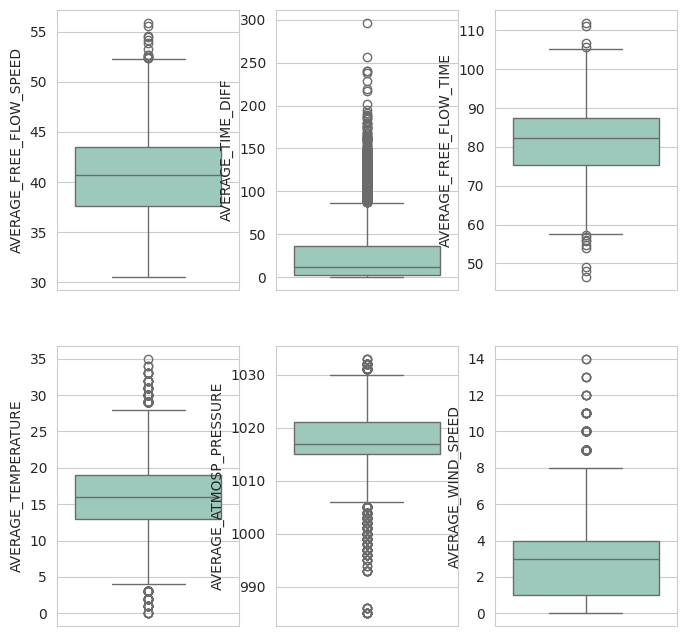

In [90]:
fig, axs = plt.subplots(2, 3, figsize=(8,8))
sns.boxplot(y=traffic_train["AVERAGE_FREE_FLOW_SPEED"],ax=axs[0,0])
sns.boxplot(y=traffic_train["AVERAGE_TIME_DIFF"],ax=axs[0,1])
sns.boxplot(y=traffic_train["AVERAGE_FREE_FLOW_TIME"],ax=axs[0,2])
sns.boxplot(y=traffic_train["AVERAGE_TEMPERATURE"],ax=axs[1,0])
sns.boxplot(y=traffic_train["AVERAGE_ATMOSP_PRESSURE"],ax=axs[1,1])
sns.boxplot(y=traffic_train["AVERAGE_WIND_SPEED"],ax=axs[1,2])

traffic_train.describe()

In [85]:
## REMOVING OUTLIERS

features = ['AVERAGE_FREE_FLOW_SPEED', 'AVERAGE_TIME_DIFF', 'AVERAGE_FREE_FLOW_TIME',
            'AVERAGE_TEMPERATURE', 'AVERAGE_ATMOSP_PRESSURE',
            'AVERAGE_HUMIDITY', 'AVERAGE_WIND_SPEED']

traffic_train_inter_quartil = traffic_train.copy()

for col in features:
    Q1 = traffic_train_inter_quartil[col].quantile(0.25)
    Q3 = traffic_train_inter_quartil[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    traffic_train_inter_quartil = traffic_train_inter_quartil[(traffic_train_inter_quartil[col] >= lower_bound) & (traffic_train_inter_quartil[col] <= upper_bound)]

,AVERAGE_FREE_FLOW_SPEED,AVERAGE_TIME_DIFF,AVERAGE_FREE_FLOW_TIME,AVERAGE_TEMPERATURE,AVERAGE_ATMOSP_PRESSURE,AVERAGE_HUMIDITY,AVERAGE_WIND_SPEED,AVERAGE_PRECIPITATION
count,5317.000000,5317.000000,5317.000000,5317.000000,5317.000000,5317.000000,5317.000000,5317.0
mean,40.653301,18.239063,81.079537,16.258793,1017.633064,82.016080,2.859319,0.0
std,4.019707,21.162602,8.147913,4.547207,3.758039,15.918965,1.917346,0.0
min,30.500000,0.000000,58.800000,4.000000,1008.000000,38.000000,0.000000,0.0
25%,37.700000,1.800000,75.500000,13.000000,1015.000000,72.000000,1.000000,0.0
50%,40.700000,9.400000,82.400000,16.000000,1017.000000,87.000000,3.000000,0.0
75%,43.400000,28.600000,87.300000,19.000000,1020.000000,93.000000,4.000000,0.0
max,52.300000,87.300000,103.800000,28.000000,1027.000000,100.000000,8.000000,0.0


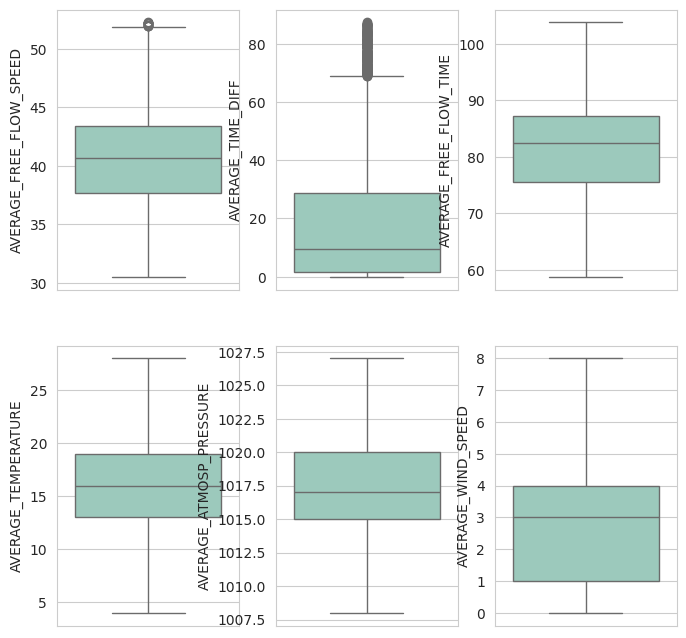

In [88]:
fig, axs = plt.subplots(2, 3, figsize=(8,8))
sns.boxplot(y=traffic_train_inter_quartil["AVERAGE_FREE_FLOW_SPEED"],ax=axs[0,0])
sns.boxplot(y=traffic_train_inter_quartil["AVERAGE_TIME_DIFF"],ax=axs[0,1])
sns.boxplot(y=traffic_train_inter_quartil["AVERAGE_FREE_FLOW_TIME"],ax=axs[0,2])
sns.boxplot(y=traffic_train_inter_quartil["AVERAGE_TEMPERATURE"],ax=axs[1,0])
sns.boxplot(y=traffic_train_inter_quartil["AVERAGE_ATMOSP_PRESSURE"],ax=axs[1,1])
sns.boxplot(y=traffic_train_inter_quartil["AVERAGE_WIND_SPEED"],ax=axs[1,2])

traffic_train_inter_quartil.describe()

In [87]:
features = ['AVERAGE_FREE_FLOW_SPEED', 'AVERAGE_TIME_DIFF', 'AVERAGE_FREE_FLOW_TIME',
            'AVERAGE_TEMPERATURE', 'AVERAGE_ATMOSP_PRESSURE',
            'AVERAGE_HUMIDITY', 'AVERAGE_WIND_SPEED']

z_score_threshold = 3 

traffic_train_zscore_cleaned = traffic_train.copy()

print(f"Linhas originais: {len(traffic_train_zscore_cleaned)}")
print(f"--- Removendo outliers com Z-Score > {z_score_threshold} ---")

for col in features:
    # Calcular a média (mean) e o desvio padrão (std) da coluna
    mean_val = traffic_train_zscore_cleaned[col].mean()
    std_val = traffic_train_zscore_cleaned[col].std()
    
    # Calcular os limites (3 desvios-padrão da média)
    lower_bound_z = mean_val - z_score_threshold * std_val
    upper_bound_z = mean_val + z_score_threshold * std_val
    
    # Manter apenas as linhas onde o valor da coluna está DENTRO dos limites
    traffic_train_zscore_cleaned = traffic_train_zscore_cleaned[
        (traffic_train_zscore_cleaned[col] >= lower_bound_z) & 
        (traffic_train_zscore_cleaned[col] <= upper_bound_z)
    ]

Linhas originais: 6812
--- Removendo outliers com Z-Score > 3 ---


,AVERAGE_FREE_FLOW_SPEED,AVERAGE_TIME_DIFF,AVERAGE_FREE_FLOW_TIME,AVERAGE_TEMPERATURE,AVERAGE_ATMOSP_PRESSURE,AVERAGE_HUMIDITY,AVERAGE_WIND_SPEED,AVERAGE_PRECIPITATION
count,6446.000000,6446.000000,6446.000000,6446.000000,6446.000000,6446.000000,6446.000000,6446.0
mean,40.632966,22.892678,81.213714,16.174992,1017.754576,80.316708,2.966336,0.0
std,4.088023,27.980428,8.225209,5.078134,5.081153,17.832662,2.006804,0.0
min,30.500000,0.000000,56.900000,1.000000,1001.000000,26.000000,0.000000,0.0
25%,37.600000,2.100000,75.500000,13.000000,1015.000000,70.000000,1.000000,0.0
50%,40.700000,11.500000,82.600000,16.000000,1018.000000,83.000000,3.000000,0.0
75%,43.500000,34.200000,87.400000,19.000000,1021.000000,93.000000,4.000000,0.0
max,52.700000,126.000000,105.800000,31.000000,1033.000000,100.000000,9.000000,0.0


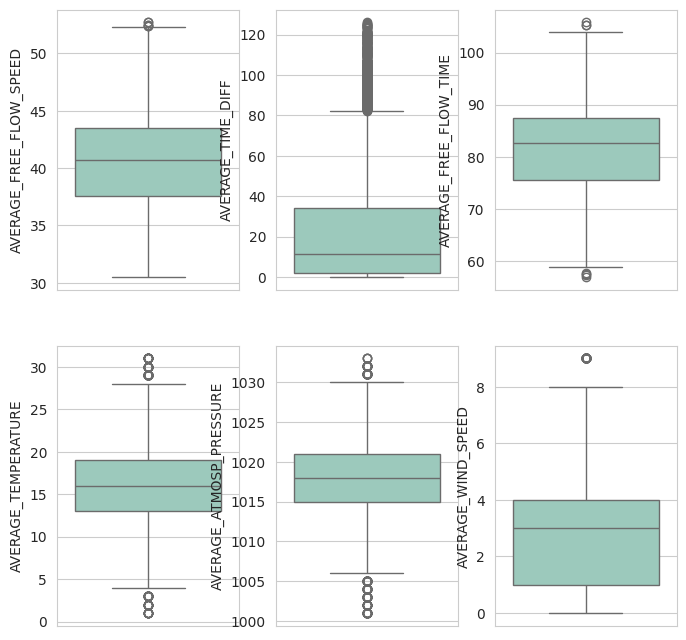

In [89]:
fig, axs = plt.subplots(2, 3, figsize=(8,8))
sns.boxplot(y=traffic_train_zscore_cleaned["AVERAGE_FREE_FLOW_SPEED"],ax=axs[0,0])
sns.boxplot(y=traffic_train_zscore_cleaned["AVERAGE_TIME_DIFF"],ax=axs[0,1])
sns.boxplot(y=traffic_train_zscore_cleaned["AVERAGE_FREE_FLOW_TIME"],ax=axs[0,2])
sns.boxplot(y=traffic_train_zscore_cleaned["AVERAGE_TEMPERATURE"],ax=axs[1,0])
sns.boxplot(y=traffic_train_zscore_cleaned["AVERAGE_ATMOSP_PRESSURE"],ax=axs[1,1])
sns.boxplot(y=traffic_train_zscore_cleaned["AVERAGE_WIND_SPEED"],ax=axs[1,2])

traffic_train_zscore_cleaned.describe()